# 线性模型

## 线性模型预测 wave 数据集

w[0]: 0.393906  b: -0.031804


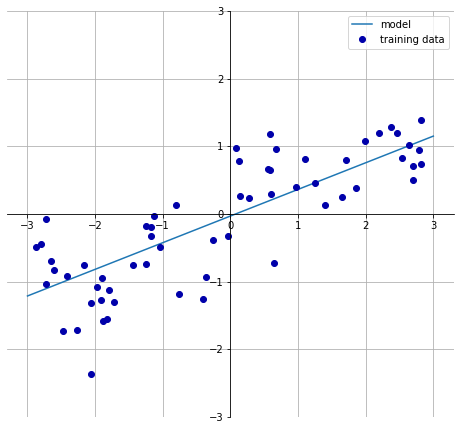

In [51]:
import numpy as np
import mglearn
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

mglearn.plots.plot_linear_regression_wave()
plt.show()

## 线性回归模型

### 线性回归（最小二乘法） 训练模型

模型简单，欠拟合

In [52]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

lr.coef_: [0.39001024]
lr.intercept_: -0.10023808171438695
Training set score: 0.5806893881260262
Test set score: 0.8323312763209392


处理波士顿房价数据集，维数较高，过拟合

In [53]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

Training set score: 0.9520519609032728
Test set score: 0.6074721959665987


### 岭回归实现L2正则化

In [54]:
from sklearn.linear_model import Ridge

ridge1 = Ridge().fit(X_train, y_train)

print('ridge alpha=1:')
print('Training set score:', ridge1.score(X_train, y_train))
print('Test set score:', ridge1.score(X_test, y_test))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('ridge alpha=10:')
print('Training set score:', ridge10.score(X_train, y_train))
print('Test set score:', ridge10.score(X_test, y_test))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('ridge alpha=0.1:')
print('Training set score:', ridge01.score(X_train, y_train))
print('Test set score:', ridge01.score(X_test, y_test))

ridge alpha=1:
Training set score: 0.885796658517094
Test set score: 0.7527683481744751
ridge alpha=10:
Training set score: 0.7882787115369614
Test set score: 0.6359411489177309
ridge alpha=0.1:
Training set score: 0.9282273685001989
Test set score: 0.7722067936479815


### lasso 回归实现L1正则化

lasso alpha=1:
Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of features used: 4
lasso alpha=0.01:
Training set score: 0.8962226511086497
Test set score: 0.7656571174549982
Number of features used: 33
lasso alpha=0.0001:
Training set score: 0.9507158754515463
Test set score: 0.643746742127282
Number of features used: 96


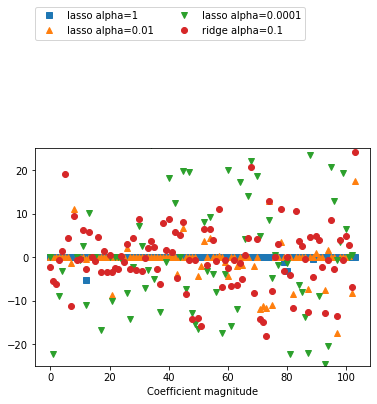

In [55]:
from sklearn.linear_model import Lasso

lasso1 = Lasso().fit(X_train, y_train)

print('lasso alpha=1:')
print('Training set score:', lasso1.score(X_train, y_train))
print('Test set score:', lasso1.score(X_test, y_test))
print('Number of features used:', np.sum(lasso1.coef_ != 0))
print('='*40)

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('lasso alpha=0.01:')
print('Training set score:', lasso001.score(X_train, y_train))
print('Test set score:', lasso001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso001.coef_ != 0))
print('='*40)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('lasso alpha=0.0001:')
print('Training set score:', lasso00001.score(X_train, y_train))
print('Test set score:', lasso00001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso00001.coef_ != 0))
print('='*40)

plt.plot(lasso1.coef_, 's', label='lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='ridge alpha=0.1')

plt.xlabel('Coefficient index')
plt.xlabel('Coefficient magnitude')

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.5))

### 训练参数分析

#### 岭回归和线性回归的参数

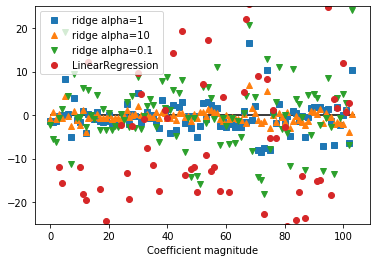

In [56]:
plt.plot(ridge1.coef_, 's', label='ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('Coefficient index')
plt.xlabel('Coefficient magnitude')

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

#### 岭回归和线性回归的学习曲线

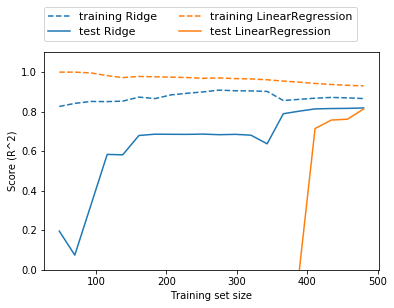

In [57]:
mglearn.plots.plot_ridge_n_samples()

## 线性分类器 logistic 回归与SVM

### logistic回归与线性SVM 

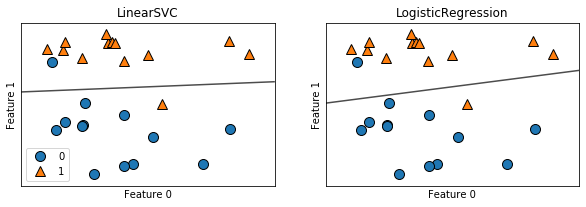

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()
plt.show()

正则化系数 c 值效果

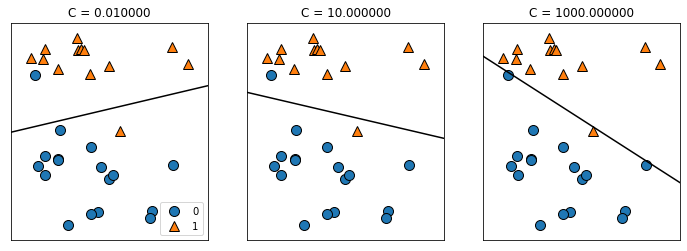

In [59]:
mglearn.plots.plot_linear_svc_regularization()

### 乳腺癌数据集上的logistic回归

Training set score: 0.960093896713615
Test set score: 0.9440559440559441
Number of features used: 30
Training set score: 0.9741784037558685
Test set score: 0.958041958041958
Training set score: 0.9389671361502347
Test set score: 0.9300699300699301


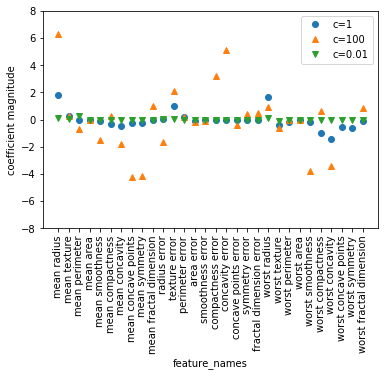

In [60]:
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target,
                                                    stratify=canser.target, random_state=1)

logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))
print('Number of features used:', np.sum(logreg.coef_ != 0))
print('='*40)

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))
print('='*40)

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))
print('='*40)

plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label='c=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.01')
plt.xticks(range(canser.data.shape[1]), canser.feature_names, rotation=90)
plt.ylim(-8, 8)
plt.xlabel('feature_names')
plt.ylabel('coefficient magnitude')
plt.legend()
plt.show()

### 换用L1正则化的逻辑回归方法

Training set score: 0.9624413145539906
Test set score: 0.9440559440559441
Number of features used: 11
Training set score: 0.9906103286384976
Test set score: 0.972027972027972
Training set score: 0.9154929577464789
Test set score: 0.9300699300699301


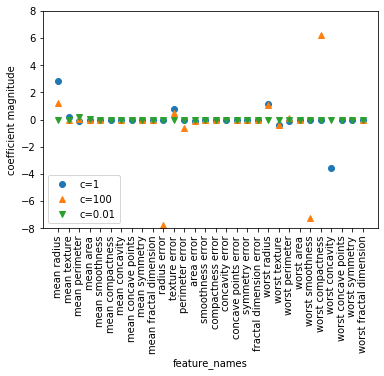

In [61]:
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target,
                                                    stratify=canser.target, random_state=1)

logreg = LogisticRegression(penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))
print('Number of features used:', np.sum(logreg.coef_ != 0))
print('='*40)

logreg100 = LogisticRegression(C=100, penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))
print('='*40)

logreg001 = LogisticRegression(C=0.01, penalty='l1').fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))
print('='*40)

plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label='c=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.01')
plt.xticks(range(canser.data.shape[1]), canser.feature_names, rotation=90)
plt.ylim(-8, 8)
plt.xlabel('feature_names')
plt.ylabel('coefficient magnitude')
plt.legend()
plt.show()

## 多分类方法实现

导入三分类数据集

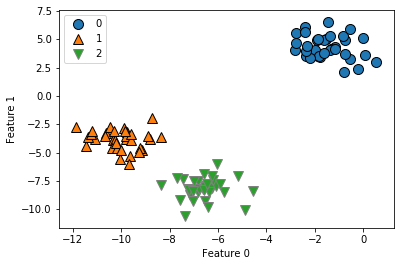

In [62]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

使用 One vs. Rest 训练线性分类器

In [63]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

print('Coefficient shape:', linear_svm.coef_)
print('Intercept shape:', linear_svm.intercept_)

Coefficient shape: [[ 0.04258882  0.38388159]
 [-0.47452728  0.17317381]
 [ 0.4800729  -0.62854395]]
Intercept shape: [ 0.14391872 -2.85329896  0.05646969]


可视化训练好的三条直线

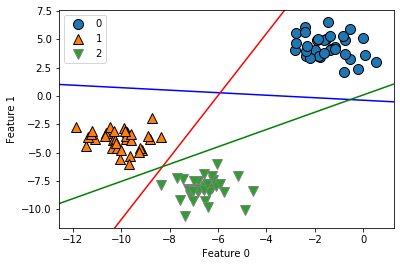

In [64]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# plt.ylim(-10, 15)
# plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

绘制决策边界

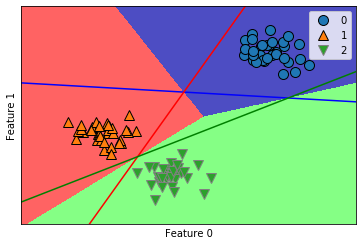

In [65]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()